# Librerias

In [1]:
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['XLA_FLAGS'] = '--xla_cpu_enable_fast_math=false'
tf.debugging.set_log_device_placement(False)

import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU detectada:")
    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print(f"Nombre: {details['device_name']}")
else:
    print("No se detectó ninguna GPU.")

2024-11-10 15:20:49.764587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 15:20:49.764617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 15:20:49.765240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 15:20:49.769133: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPU detectada:
Nombre: NVIDIA GeForce RTX 4060 Laptop GPU


2024-11-10 15:20:51.106855: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:20:51.131628: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:20:51.137691: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

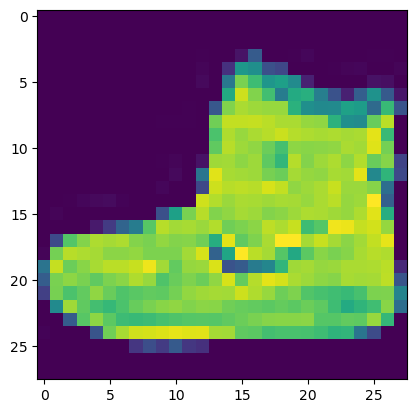

In [4]:
plt.imshow(train_images[0])

normalizamos

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

no se que hace esto :v osea si se pero no se porque:

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

hay que hacer one hot encodding para que la red neuronal maneje mejor las labels:

In [7]:
train_labels[0]

9

In [8]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [9]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Definiendo la red neuronal

In [10]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

2024-11-10 15:20:52.108552: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:20:52.115120: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:20:52.120653: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Entrenamiento de la red

In [12]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10


2024-11-10 15:20:52.863452: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-11-10 15:20:52.933855: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-11-10 15:20:53.621389: I external/local_xla/xla/service/service.cc:168] XLA service 0x77e889408d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-10 15:20:53.621412: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-11-10 15:20:53.625083: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731270053.657857    9522 device_compiler.h:186] Compiled clust

938/938 [==============================] - 4s 2ms/step - loss: 0.5876 - accuracy: 0.7837
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4075 - accuracy: 0.8530
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3600 - accuracy: 0.8699
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3334 - accuracy: 0.8794
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3232 - accuracy: 0.8839
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3090 - accuracy: 0.8898
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3022 - accuracy: 0.8910
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2972 - accuracy: 0.8944
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2928 - accuracy: 0.8959
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.8958


# Testeando la red

In [13]:
model.evaluate(test_images, test_labels, verbose=0)

[0.2791658937931061, 0.9061999917030334]

# Early stopping

In [14]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)

In [15]:
model.fit(train_images, train_labels, batch_size=64, epochs=10, callbacks=[early])

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2885 - accuracy: 0.8986
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2868 - accuracy: 0.8998
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2873 - accuracy: 0.8995


# Checkpoints

In [16]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model_weights_best.keras', monitor='accuracy', save_best_only=True, verbose=1)

In [18]:
model.fit(train_images, train_labels, batch_size=64, epochs=10, callbacks=[checkpoint])

Epoch 1/10
925/938 [============================>.] - ETA: 0s - loss: 0.2848 - accuracy: 0.9002
Epoch 1: accuracy improved from -inf to 0.89995, saving model to model_weights_best.keras
938/938 [==============================] - 2s 2ms/step - loss: 0.2852 - accuracy: 0.9000
Epoch 2/10
925/938 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.9019
Epoch 2: accuracy improved from 0.89995 to 0.90182, saving model to model_weights_best.keras
938/938 [==============================] - 2s 2ms/step - loss: 0.2809 - accuracy: 0.9018
Epoch 3/10
935/938 [============================>.] - ETA: 0s - loss: 0.2800 - accuracy: 0.9026
Epoch 3: accuracy improved from 0.90182 to 0.90270, saving model to model_weights_best.keras
938/938 [==============================] - 2s 2ms/step - loss: 0.2798 - accuracy: 0.9027
Epoch 4/10
934/938 [============================>.] - ETA: 0s - loss: 0.2779 - accuracy: 0.9031
Epoch 4: accuracy improved from 0.90270 to 0.90318, saving model to model

In [19]:
best_model = model.load_weights('./model_weights_best.keras')

In [20]:
model.evaluate(test_images, test_labels, verbose=0)

[0.2585315406322479, 0.911899983882904]